In [4]:
import torch
from torchvision import datasets,transforms
import helper
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
trainset = datasets.FashionMNIST('../data/MNIST_F/',download=False,
                                   train=True,transform=transform)
trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)
testset=datasets.FashionMNIST('../data/MNIST_F/',download=False,
                                   train=False,transform=transform)
testloader=torch.utils.data.DataLoader(testset,batch_size=64,shuffle=True)

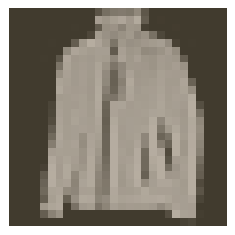

In [3]:
image,label = next(iter(trainloader))
helper.imshow(image[0,:]);

In [4]:
from torch import nn
import torch.nn.functional as F
from torch import optim

In [5]:
image.shape

torch.Size([64, 1, 28, 28])

In [31]:
n_input=784
n_hidden=[256,128,64]
n_output=10

Model = nn.Sequential(nn.Linear(n_input,n_hidden[0]),
                     nn.ReLU(),
                     nn.Linear(n_hidden[0],n_hidden[1]),
                     nn.ReLU(),
                     nn.Linear(n_hidden[1],n_hidden[2]),
                     nn.ReLU(),
                     nn.Linear(n_hidden[2],n_output),
                     nn.LogSoftmax(dim=1))
criterion = nn.NLLLoss()
optimizer = optim.Adam(Model.parameters())


In [7]:
print(Model)

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=64, bias=True)
  (5): ReLU()
  (6): Linear(in_features=64, out_features=10, bias=True)
  (7): LogSoftmax()
)


In [32]:
epochs=5
train_losses,test_losses=[],[]
for e in range(epochs):
    running_loss=0;
    for images,labels in iter(trainloader):
        t_images=images.view(images.shape[0],-1)
        logits=Model(t_images)
        optimizer.zero_grad()
        loss = criterion(logits,labels)
        loss.backward();
        optimizer.step();
        
        running_loss+=loss.item();
        
    else:
        
        test_loss=0;
        accuracy=0;
        len_test=0;
        with torch.no_grad():
            for images,labels in iter(testloader):

                t_images=images.view(images.shape[0],-1)
                output=Model(t_images)
                pred=torch.argmax(output,dim=1)
                accuracy+=torch.mean((pred==labels).type(torch.FloatTensor))
                
                loss = criterion(output,labels);
                test_loss+=loss.item();
                
        test_losses.append(test_loss/len(testloader))
        train_losses.append(running_loss/len(trainloader))
        
        print("Train Loss: {:.3f} ".format(running_loss/len(trainloader)),
              "Test_Loss: {:.3f}".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Train Loss: 0.516  Test_Loss: 0.474 Test Accuracy: 0.819
Train Loss: 0.379  Test_Loss: 0.387 Test Accuracy: 0.859
Train Loss: 0.340  Test_Loss: 0.368 Test Accuracy: 0.865
Train Loss: 0.315  Test_Loss: 0.374 Test Accuracy: 0.862
Train Loss: 0.293  Test_Loss: 0.349 Test Accuracy: 0.875


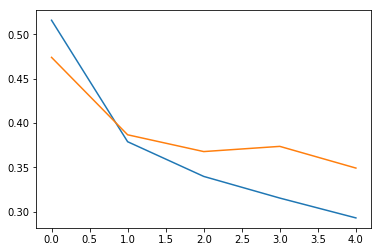

In [33]:
plt.plot(train_losses,label='Training Loss')
plt.plot(test_losses,label='Test Loss')
# plt.legend()

In [10]:
torch.argmax(Model(t_images[0].view(1,-1)))

tensor(4)

In [11]:
F.softmax(output[0].view(1,-1),dim=1)

tensor([[ 1.1185e-04,  2.5286e-05,  3.6864e-01,  1.0633e-05,  6.2427e-01,
          8.3472e-07,  6.9135e-03,  1.0692e-06,  2.6180e-05,  2.8682e-07]])

Labels
Each training and test example is assigned to one of the following labels:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

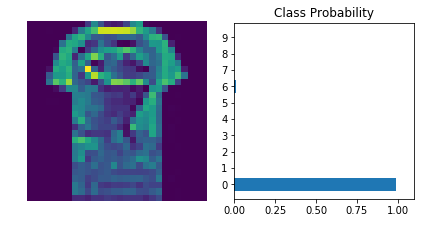

In [12]:
helper.view_classify(t_images[1].view(1,28,28),F.softmax(output[1].view(1,-1),dim=1));

Let's Add Dropouts

In [41]:
n_input=784
n_hidden=[256,128,64]
n_output=10

Model = nn.Sequential(nn.Linear(n_input,n_hidden[0]),
                     nn.ReLU(),
                     nn.Dropout(p=0.2), 
                     nn.Linear(n_hidden[0],n_hidden[1]),
                     nn.ReLU(),
                     nn.Dropout(p=0.2),
                     nn.Linear(n_hidden[1],n_hidden[2]),
                     nn.ReLU(),
                     nn.Dropout(p=0.2),
                     nn.Linear(n_hidden[2],n_output),
                     nn.LogSoftmax(dim=1))
criterion = nn.NLLLoss()
optimizer = optim.Adam(Model.parameters())


In [38]:
print(Model)

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.2)
  (3): Linear(in_features=256, out_features=128, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.2)
  (6): Linear(in_features=128, out_features=64, bias=True)
  (7): ReLU()
  (8): Dropout(p=0.2)
  (9): Linear(in_features=64, out_features=10, bias=True)
  (10): LogSoftmax()
)


In [14]:
Model=model.forward()

In [15]:
epochs=10
train_losses,test_losses=[],[]
for e in range(epochs):
    running_loss=0;
    for images,labels in iter(trainloader):
        t_images=images.view(images.shape[0],-1)
        logits=Model(t_images)
        optimizer.zero_grad()
        loss = criterion(logits,labels)
        loss.backward();
        optimizer.step();
        
        running_loss+=loss.item();
        
    else:
        
        test_loss=0;
        accuracy=0;
        len_test=0;
        
        with torch.no_grad():
            Model.eval(); # This ensures to remove dropout layer for test
            for images,labels in iter(testloader):

                t_images=images.view(images.shape[0],-1)
                output=Model(t_images)
                pred=torch.argmax(output,dim=1)
                accuracy+=torch.mean((pred==labels).type(torch.FloatTensor))
                
                loss = criterion(output,labels);
                test_loss+=loss.item();
                
        test_losses.append(test_loss/len(testloader))
        train_losses.append(running_loss/len(trainloader))
        Model.train(); # This ensures to add back dropout layer for train
        
        print("Epoch: {}/{}".format(e,epochs),"Train Loss: {:.3f} ".format(running_loss/len(trainloader)),
              "Test_Loss: {:.3f}".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

TypeError: train() missing 3 required positional arguments: 'testloader', 'criterion', and 'optimizer'

In [16]:
type(model)

fc_loader.Network

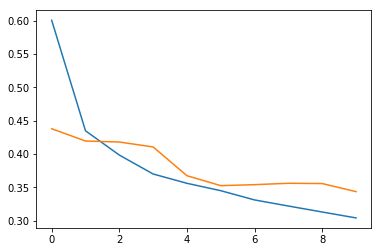

In [43]:
plt.plot(train_losses,label='Training Loss')
plt.plot(test_losses,label='Test Loss')
# plt.legend()

In [46]:
print(Model)
Model.state_dict().keys()

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.2)
  (3): Linear(in_features=256, out_features=128, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.2)
  (6): Linear(in_features=128, out_features=64, bias=True)
  (7): ReLU()
  (8): Dropout(p=0.2)
  (9): Linear(in_features=64, out_features=10, bias=True)
  (10): LogSoftmax()
)


odict_keys(['0.weight', '0.bias', '3.weight', '3.bias', '6.weight', '6.bias', '9.weight', '9.bias'])

In [54]:
torch.save(Model.state_dict(),"../models/Fashion_MNIST_784,256,128,64,10")

In [25]:
import fc_loader

In [26]:
model=fc_loader.Network(784,10,[256,128,64],0.2)

In [27]:
print(model)

Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): Linear(in_features=256, out_features=128, bias=True)
    (2): Linear(in_features=128, out_features=64, bias=True)
  )
  (output): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.2)
)


In [28]:
criterion=torch.nn.NLLLoss();
optimizer=torch.optim.Adam(model.parameters())

In [29]:
import importlib

In [24]:
importlib.reload(fc_loader)

<module 'fc_loader' from '/Users/nithin_rao/MyFiles/MS/OnlineLearning/Pytorch_DeepLearning/Lesson4_Intro_to_Pytorch/fc_loader.py'>

In [30]:
fc_loader.train(model,trainloader,testloader,criterion,optimizer)

NameError: name 'test_losses' is not defined

In [5]:
state_dict=torch.load("../models/Fashion_MNIST_784,256,128,64,10")

In [6]:
state_dict.keys()

odict_keys(['0.weight', '0.bias', '3.weight', '3.bias', '6.weight', '6.bias', '9.weight', '9.bias'])

In [7]:
model.load_state_dict(state_dict)

RuntimeError: Error(s) in loading state_dict for Network:
	Missing key(s) in state_dict: "hidden_layers.0.weight", "hidden_layers.0.bias", "hidden_layers.1.weight", "hidden_layers.1.bias", "hidden_layers.2.weight", "hidden_layers.2.bias", "output.weight", "output.bias". 
	Unexpected key(s) in state_dict: "0.weight", "0.bias", "3.weight", "3.bias", "6.weight", "6.bias", "9.weight", "9.bias". 

In [ ]:
state_dict.